In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
#from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)
#from labellines import labelLine, labelLines

# Computation of collision events
Store:
* freq_col
* col_intens

In [419]:
#Ship types (?)
mass = [100 ,250 ,500 ,750, 1000] #t
#freqran=list(np.random.randint(low = 0,high=5,size=len(Ecol))) #per year
#freq=[1e-1*f for f in freqran]
freq_col = [0.3, 0.1, 0.01, 0.02, 0.05] #per year
# freq=[0.8,0.1,0.01,0.02,0.05]#per year
v = 0.5 #m/s
col_intens = [0.5*m*(v**2)*1e-3 for m in mass] #MJ
print('lambdas: ', freq_col, ', energy_event: ', col_intens)

lambdas:  [0.3, 0.1, 0.01, 0.02, 0.05] , energy_event:  [0.0125, 0.03125, 0.0625, 0.09375, 0.125]


In [405]:
def energy_collision(impact_energy_start):
    collision_events = np.random.poisson(lam = freq_col, size=None)
    index_impact_braces = np.array([0, 1, 2, 3, 8, 9, 10, 11], dtype = int)
    impact_energy = impact_energy_start.copy()
    for i in range(5):
        if collision_events[i] > 0:
            for _ in range(collision_events[i]):
                ind_energy = np.random.choice(index_impact_braces)
                impact_energy[ind_energy] += col_intens[i]
    return impact_energy

In [447]:
impact_energy_start = np.zeros(13)
imp_energy = energy_collision(impact_energy_start)
imp_energy

array([0.     , 0.09375, 0.     , 0.0625 , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.0125 , 0.     , 0.     ])

## Definition of geometry and mechanical parameters

In [85]:
#Zayas frame braces 
z1,z2,z3,z4=0.702,3.048,3.048,1.524
x1,x2=0,3.048
xa,ya,dim_a = [x2,0.5*x2], [z1+z2+z3, z1+z2+0.5*z3], [0.102,0.002, 2.15526]
xb,yb,dim_b = [x1,0.5*x2], [z1+z2, z1+z2+0.5*z3], [0.102,0.002, 2.15526]
xc,yc,dim_c = [x1,0.5*x2], [z1+z2+z3, z1+z2+0.5*z3], [0.102,0.002, 2.15526]
xd,yd,dim_d = [x2,0.5*x2], [z1+z2, z1+z2+0.5*z3], [0.102,0.002, 2.15526]
xe,ye,dim_e = [x2,0.5*x2], [z1+z2, z1+0.5*z2], [0.127,0.003, 2.15526]
xf,yf,dim_f = [x1,0.5*x2], [z1, z1+0.5*z2], [0.127,0.003, 2.15526]
xg,yg,dim_g = [x1,0.5*x2], [z1+z2, z1+0.5*z2], [0.127,0.003, 2.15526]
xh,yh,dim_h = [x2,0.5*x2], [z1, z1+0.5*z2], [0.127,0.003, 2.15526]
xi,yi,dim_i = [x1,0.5*x2], [z1+z2+z3, z1+z2+z3+z4], [0.152,0.0032, 2.15526]
xj,yj,dim_j = [x2,0.5*x2], [z1+z2+z3, z1+z2+z3+z4], [0.152,0.0032, 2.15526]
xk,yk,dim_k = [x1,x2], [z1+z2+z3, z1+z2+z3], [0.102,0.002, 3.048]
xl,yl,dim_l = [x1,x2], [z1+z2, z1+z2], [0.102,0.002, 3.048]
xm,ym,dim_m = [x1,x2], [z1, z1], [0.102,0.002, 3.048]

#sl=4. #sea level
sigy=284 #MPa
el_id=['a','b','c','d','e','f','g','h','i','j','k','l','m']

d=np.array([dim_a,dim_b,dim_c,dim_d,dim_e,dim_f,dim_g,dim_h,
              dim_i,dim_j,dim_k,dim_l,dim_m]).T
dim = pd.DataFrame(d ,index=['diameter','thickness','length'], columns=el_id)

(-0.1524, 3.2004, 0.32099999999999995, 8.703)

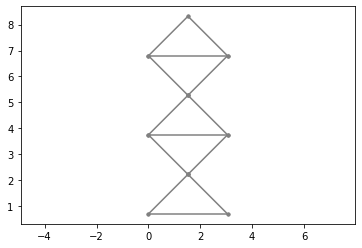

In [5]:
#Draw frame
fig1=plt.subplots()
plt.plot(xa,ya,xb,yb,xc,yc,xd,yd,xe,ye,xf,yf,xg,yg,xh,yh,xi,yi,xj,yj,
         xk,yk,xl,yl,xm,ym,marker = '.',color='grey')
plt.axis('equal')

In [86]:
dim

,a,b,c,d,e,f,g,h,i,j,k,l,m
diameter,0.10200,0.10200,0.10200,0.10200,0.12700,0.12700,0.12700,0.12700,0.15200,0.15200,0.102,0.102,0.102
thickness,0.00200,0.00200,0.00200,0.00200,0.00300,0.00300,0.00300,0.00300,0.00320,0.00320,0.002,0.002,0.002
length,2.15526,2.15526,2.15526,2.15526,2.15526,2.15526,2.15526,2.15526,2.15526,2.15526,3.048,3.048,3.048


In [107]:
index_impacted = ['a','b','c','d','i','j','k','l']

# Computing energy max
Store:
* energy_max
* energy_max_index
* energy_max_samp

In [451]:
energy_max = np.zeros((2, int(1e5)))

od = dim['a']['diameter']
wt = dim['a']['thickness']

samp = int(1e5)
k = np.random.uniform(1250, 12800, size=(samp))
m = np.random.normal(2.75, 0.12, size=(samp)) 

sigy = 284 #MPa
Np = sigy*np.pi*wt*(od-wt)
Mp = sigy*wt*(od-wt)**2
l = np.sqrt((xa[0]-xa[1])**2 + (ya[0]-ya[1])**2)

thmax = k*(wt/od)**m
Emax = 4*Mp*thmax+0.5*Np*l*(thmax**2)
energy_max[0] = Emax

od = dim['i']['diameter']
wt = dim['i']['thickness']

samp = int(1e5)
k = np.random.uniform(1250, 12800, size=(samp))
m = np.random.normal(2.75, 0.12, size=(samp)) 

sigy = 284 #MPa
Np = sigy*np.pi*wt*(od-wt)
Mp = sigy*wt*(od-wt)**2
l = np.sqrt((xi[0]-xi[1])**2 + (yi[0]-yi[1])**2)

thmax = k*(wt/od)**m
Emax = 4*Mp*thmax+0.5*Np*l*(thmax**2)
energy_max[1] = Emax

energy_max_index = np.array([0,0,0,0,2,2,2,2,1,1,0,0,2],dtype=int)
energy_max_samp = samp

# pf_mc = np.sum(Emax < energy_mc) /samp

In [130]:
energy_max.shape

(2, 100000)

In [132]:
energy_max_index

array([0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2])

## Method for computing $p_{f_{col}}$

In [456]:
def pf_col(energy):
    pf_brace = np.zeros(13)
    for i in range(13):
        if energy[i] > 0:
            pf_brace[i] = np.sum(energy_max[energy_max_index[i]] < energy[i]) / energy_max_samp
    return pf_brace

In [453]:
imp_energy

array([0.     , 0.09375, 0.     , 0.0625 , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.0125 , 0.     , 0.     ])

In [457]:
pf_col(imp_energy)

array([0.     , 0.99579, 0.     , 0.98655, 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.73148, 0.     , 0.     ])

# Storing input info

In [463]:
np.savez('collision_info.npz', freq_col=freq_col, col_intens=col_intens, energy_max=energy_max, 
         energy_max_index=energy_max_index, energy_max_samp=energy_max_samp)

In [462]:
energy_max_samp

100000

### Examples for the calculation of $E_{max}$

### Element 'a'

In [73]:
od = dim['a']['diameter']
wt = dim['a']['thickness']

samp = int(1e5)
k = np.random.uniform(1250, 12800, size=(samp))
m = np.random.normal(2.75, 0.12, size=(samp)) 

sigy = 284 #MPa
Np = sigy*np.pi*wt*(od-wt)
Mp = sigy*wt*(od-wt)**2
l = np.sqrt((xa[0]-xa[1])**2 + (ya[0]-ya[1])**2)

thmax = k*(wt/od)**m
Emax = 4*Mp*thmax+0.5*Np*l*(thmax**2)

# bin = 0.0125 - 0.125

print('prob_IM_1', np.sum(Emax < 0.00125) /samp)
print('prob_IM_1', np.sum(Emax < 0.0125) /samp)
print('prob_IM_2', np.sum(Emax < 0.03125) /samp)
print('prob_IM_3', np.sum(Emax < 0.0625) /samp)
print('prob_IM_4', np.sum(Emax < 0.09375) /samp)
print('prob_IM_5', np.sum(Emax < 0.125) /samp)

prob_IM_1 0.09202
prob_IM_1 0.73252
prob_IM_2 0.93368
prob_IM_3 0.98574
prob_IM_4 0.99528
prob_IM_5 0.99816


In [66]:
od = dim['i']['diameter']
wt = dim['i']['thickness']

samp = int(1e5)
k = np.random.uniform(1250, 12800, size=(samp))
m = np.random.normal(2.75, 0.12, size=(samp)) 

sigy = 284 #MPa
Np = sigy*np.pi*wt*(od-wt)
Mp = sigy*wt*(od-wt)**2
l = np.sqrt((xi[0]-xi[1])**2 + (yi[0]-yi[1])**2)

thmax = k*(wt/od)**m
Emax = 4*Mp*thmax+0.5*Np*l*(thmax**2)

# bin = 0.0125 - 0.125

print('prob_IM_1', np.sum(Emax < 0.0125) /samp)
print('prob_IM_2', np.sum(Emax < 0.03125) /samp)
print('prob_IM_3', np.sum(Emax < 0.0625) /samp)
print('prob_IM_4', np.sum(Emax < 0.09375) /samp)
print('prob_IM_5', np.sum(Emax < 0.125) /samp)

prob_IM_1 0.27964
prob_IM_2 0.58969
prob_IM_3 0.81345
prob_IM_4 0.90221
prob_IM_5 0.94369


In [21]:
from scipy.stats import poisson
#N=10000 lifes 
years=30
e=np.empty((len(freq),years))
el_imp=[]
en_imp=[]
for j in range (0,years):
    el=[]
    en=[]
    for i in range (0,len(freq)):
        e[i,j] = np.random.poisson(lam=freq[i], size=None)
        #Element impacted
        for k in range (0,int(e[i,j])):
            el.append(np.random.choice(['a','b','c','d','i','j','k','l']))
            en.append("%.2f" % Ecol[i])
        #if 0<=i<=2:
        #    for k in range (0,int(e[i,j])):
        #        el.append(np.random.choice(['b','d','l']))
        #        en.append(Ecol[i])
        #if 2<=i<=3:
        #    for k in range (0,int(e[i,j])):
        #        el.append(np.random.choice(['a','c','k']))
        #        en.append(Ecol[i])
        #if 3<=i<=5:
        #    for k in range (0,int(e[i,j])):
        #        el.append(np.random.choice(['k','i','j']))
        #        en.append(Ecol[i])        
    el_imp.append(el)
    en_imp.append(en)
#events=pd.DataFrame(e,index=[str(x)+'MJ' for x in Ecol])
#events['total'] = events.sum(axis=1)
elements = pd.DataFrame(np.array([el_imp,en_imp],dtype=object))
elements

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,[],[],[c],[d],[],[],[j],[],[],[b],...,[],[],[],[d],[a],[c],"[j, d]","[a, l, b]",[b],[d]
1,[],[],[0.03],[0.01],[],[],[0.01],[],[],[0.01],...,[],[],[],[0.03],[0.01],[0.03],"[0.01, 0.03]","[0.01, 0.01, 0.03]",[0.03],[0.12]


In [7]:
d.shape[1]

13

In [25]:
pf=np.zeros((d.shape[1],years))
ecol=np.zeros((d.shape[1],years))
Eav=np.empty((d.shape[1],years))
for j in range (0,years):
    rep=[]
    impacted_elements=elements[j][0]       
    for k in range (0,d.shape[1]):
        rep.append({el_id[k]:impacted_elements.count(el_id[k]) for i in impacted_elements})
    for i in range (0,len(impacted_elements)):      
        ii=el_id.index(elements[j][0][i])
        ecol[ii,j]=elements[j][1][i]
        od,wt=dim[elements[j][0][i]][0],dim[elements[j][0][i]][1]
        print(od,wt)
        l=np.sqrt((xd[0]-xd[1])**2+(yd[0]-yd[1])**2)
        #Fully plastic
        Np=sigy*np.pi*wt*(od-wt)
        Mp=sigy*wt*(od-wt)**2
        ##Average for max angle and energy
        #thmax_av=1250*(wt/od)**2.75
        #Emax_av=4*Mp*thmax_av+0.5*Np*l*(thmax_av**2)       
        n=100000
        Emax=[]
        for x in range (0,n): 
            k=np.random.uniform(1250,12800)
            m=np.random.normal(2.75, 0.12) 
            thmax=k*(wt/od)**m
            Emax.append(4*Mp*thmax+0.5*Np*l*(thmax**2))
        efail=[e for e in Emax if ecol[ii,j]>e]
        pf[ii,j]=len(efail)/len(Emax)        
fail=pd.DataFrame(pf,dtype=object,index=el_id)

0.102 0.002
0.102 0.002
0.152 0.0032
0.102 0.002
0.102 0.002
0.102 0.002
0.102 0.002
0.102 0.002
0.102 0.002
0.102 0.002
0.152 0.0032
0.102 0.002
0.102 0.002
0.102 0.002
0.102 0.002
0.102 0.002
0.102 0.002


In [25]:
fail

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
a,0.0,0.0,0.0,0.0,0.0,0.0,0.66062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b,0.0,0.0,0.0,0.0,0.0,0.65856,0.0,0.0,0.0,0.0,...,0.66019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.66035,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.66199,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
j,0.0,0.57382,0.57453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.22262,0.0,0.0,0.0


In [28]:
#Consider previous year damage 
pfcum=np.zeros((d.shape[1],years))
for j in range (0,years):
    el=elements[j][0]
    pfcum[:,0]=pf[:,0] 
    if j>0:
        for k in range (0,d.shape[1]):
            if el_id[k] not in el: 
                pfcum[k,j]=pfcum[k,j-1]
            if el_id[k] in el and (pfcum[k,j-1]==0.0 or pf[k,j-1]==1.0): 
                pfcum[k,j]=pf[k,j]
            if el_id[k] in el and 0.0<pfcum[k,j-1]<1.0:
                ecoltot=np.sum(ecol[k][0:j])
                efail_tot=[e for e in Emax if ecoltot>e]
                pfcum[k,j]=len(efail_tot)/len(Emax)
failcum=pd.DataFrame(pfcum,dtype=object,index=el_id)

In [29]:
failcum

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
a,0.0,0.0,0.0,0.0,0.0,0.0,0.66062,0.66062,0.66062,0.66062,...,0.66062,0.66062,0.66062,0.66062,0.66062,0.66062,0.66062,0.66062,0.66062,0.66062
b,0.0,0.0,0.0,0.0,0.0,0.65856,0.65856,0.65856,0.65856,0.65856,...,0.85779,0.85779,0.85779,0.85779,0.85779,0.85779,0.85779,0.85779,0.85779,0.85779
c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.65797,0.65797,0.65797,0.65797,0.65797,0.65797,0.65797,0.65797,0.65797,0.65797
d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.66035,0.66035,0.66035,...,0.66035,0.66035,0.66035,0.66035,0.66035,0.66035,0.66035,0.66035,0.66199,0.66199
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.66199,0.66199,0.66199,0.66199,0.66199,0.66199,0.66199,0.66199,0.66199,0.66199
j,0.0,0.57382,0.92714,0.92714,0.92714,0.92714,0.92714,0.92714,0.92714,0.92714,...,0.92714,0.92714,0.92714,0.92714,0.92714,0.92714,0.98418,0.98418,0.98418,0.98418


CELLS BELLOW NOT FOR RUN

In [ ]:
from scipy.stats import poisson
x = np.arange(0,5,1)
p=np.empty((len(x),len(freq)))
for i in range (0,len(freq)):
    p[:,i]=poisson.pmf(x, freq[i])
prob=pd.DataFrame(p,columns=[str(Ecol[0]),str(Ecol[1]),str(Ecol[2]),
                  str(Ecol[3]),str(Ecol[4]),str(Ecol[5]),
                  str(Ecol[6]),str(Ecol[7]),str(Ecol[8]),str(Ecol[9])])

In [ ]:
od,wt=0.41,0.02
l=12
sigy=600

In [ ]:
fig,ax=plt.subplots()
n, bins, patches = plt.hist(x=thran, bins=20, color='#0504aa',cumulative=0,alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('MJ')
plt.ylabel('Frequency')
plt.title('Collision energy')
maxfreq = n.max()
#plt.text(80, 0.5*maxfreq)
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
#plt.plot(Eran,color='brown',linestyle=(0, (5, 8)), linewidth=0.5)

In [ ]:
#Elastic
I=(np.pi/64)*(od**4-(od-2*wt)**4)
E=210e3 #MPa
Me=sigy*0.25*np.pi*wt*(od-wt)**2*(1-(wt/od)+wt**2/(od*(od-wt)))
#Me=sigy*0.25*np.pi*wt1*(od1)**2
wel=Me*l**2/(24*E*I)
thel=np.arctan(2*wel/l)

In [ ]:
Ec=np.arange(0,max(Ecol),0.001) #MJ
th=[]
for e in Ec:
    th.append(((np.sqrt(16*(Mp**2)+2*Np*l*e))-4*Mp)/(Np*l))
thdeg = [i * 180/np.pi for i in th] 

In [ ]:
thlow=122*(wt/od)**2.5
thup=12800*(wt/od)**3
dlmax=l/np.cos(thmax)-l

In [ ]:
fig1,ax1=plt.subplots()
plt.plot(Ec,th,color='brown',linestyle=(0, (5, 8)), linewidth=0.5)
plt.plot(Ec,thmax*np.ones(len(Ec)),color='red')
# plt.title('Annual cumulative frequency)')
plt.xlabel('Collision energy MJ')
plt.ylabel('Rotation')
plt.xlim([0, Emax*3])
plt.ylim([0, thmax*1.5])
plt.grid(which='major', color='#DDDDDD', linewidth=1.0)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)